[[-1.42182995 -2.59970469]
 [-1.8931652  -2.67835113]
 [-1.59702926 -2.57465682]
 [-3.04588884 -1.48296407]
 [-1.16447411 -3.50245884]
 [-2.26435659 -2.62349991]
 [-1.59727632 -2.64276488]
 [-1.86162525 -2.05678382]
 [-2.89971638 -2.68303384]
 [-1.7525881  -2.56620493]
 [-2.09081007 -2.34427007]
 [-2.21823997 -2.77226091]
 [-2.97356834 -2.50095902]
 [-2.48874301 -2.67198736]
 [-3.16292151 -1.82951621]
 [-1.71171957 -3.13598812]
 [-2.61546164 -1.70317124]
 [-2.08814465 -2.08155831]
 [-2.00595209 -2.6394275 ]
 [-1.75028083 -1.65638283]
 [-1.77585072 -3.37432668]
 [-1.94030335 -2.55836558]
 [-2.7805453  -1.49210702]
 [-2.67851901 -2.48165153]
 [-2.30890624 -2.11278011]
 [-2.8785569  -1.68149066]
 [-1.83559472 -2.93708786]
 [-2.68525363 -2.04864311]
 [-2.57654162 -2.33198647]
 [-3.19287715 -1.41800044]
 [-2.23078635 -1.98224137]
 [-2.5064079  -1.95924716]
 [-2.47667938 -2.14876807]
 [-2.2911391  -3.1327791 ]
 [-1.93861714 -1.77827501]
 [-2.6119308  -2.44752982]
 [-2.6117172  -1.9964665 ]
 

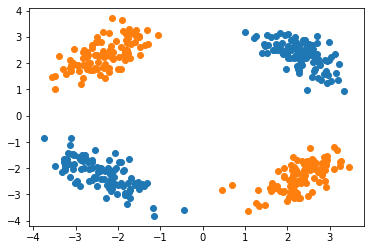

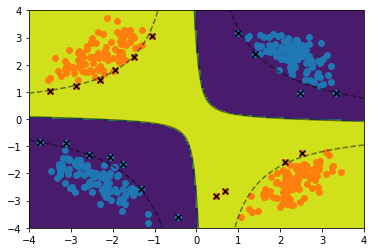

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y


X,y = gen_xor_distribution(400)

print(X)
print(y)

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

svm = SVC(C=0.01, gamma='auto', kernel='poly', degree=2)
#svm = SVC(C=0.01, gamma='auto', kernel='linear')
#svm = SVC(C=0.01, gamma='auto', kernel='poly', degree=4)
#svm = SVC(C=1000, gamma='auto', kernel='poly', degree=2)
#svm = SVC(C=0.1, gamma='auto', kernel='rbf')
#svm = SVC(C=10, gamma='auto', kernel='rbf')

svm.fit(X, y)

r = 4
npx = 200
npy = 200
x1line = np.linspace(-r, r, npx)
x2line = np.linspace(-r, r, npy)
x1grid, x2grid = np.meshgrid(x1line, x2line)
Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

class_vals = svm.predict(Xgrid)
class_vals = np.reshape(class_vals, [npx, npy])

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, class_vals)
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])
Z = np.reshape(svm.decision_function(Xgrid), [npx, npy])
ax.contour(x1line, x2line, Z, colors='k', levels=[-1, 0, 1], 
			alpha=0.5, linestyles=['--', '-', '--'])

sv = svm.support_vectors_

ax.scatter(sv[:,0],sv[:,1], marker="x", c="#000000")
